## Group Members:
1. Zainab (20F-0257)
2. Khansa (20F- 1086)
3. Shahzaib Khan (20F-1079)

## Importing Libraries

In [1]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.metrics import adjusted_rand_score


<h1 align="center" style=" background-color: yellow;">Module 1: Data Acquisition and Preprocessing:</h1>

## 1. Data Acquisition:
o Download the provided historical sales data for the electronics section.

o Ensure the data includes customer demographics, purchase history, product
details, spending amounts, and dates of transactions.

In [2]:
# Read JSON data into a DataFrame
df = pd.read_json("electronics.json",encoding='utf-8')

# Display the information related to data
print(df.info())

# Display the DataFrame
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer


<h3 style="color: red;">Data Acquisition (our observation)</h3>

1. **Customer Demographics:**
   - The dataset includes information about customers, such as their age, gender, income level, and address.

2. **Purchase History:**
   - Details about transactions are provided, including transaction ID, purchase date, product ID, purchase amount, average spending per purchase, and purchase frequency per month.

3. **Product Details:**
   - Information about products, such as product category, brand, brand affinity score, and product category preferences, is included.

4. **Spending Amounts:**
   - The dataset contains data on purchase amounts, allowing for analysis of spending patterns.

5. **Dates of Transactions:**
   - Purchase dates are included, enabling time-based analysis and trends.


## 2. Data Cleaning:
o Identify and handle missing values using appropriate techniques like
mean/median imputation or dropping rows/columns with excessive
missingness.

o Analyze outliers and determine whether to retain or remove them based on
their impact on the analysis.

o Address inconsistencies in data format and encoding.

## Observing Data:
In this section, we have observed every column and row. We have noted all of our findings for data cleaning below.

### 1. Observe Data samples
* To observe a column use .sample() to get random values from the column 
* .unique() to get unique values in a col

In [3]:
df["Customer_ID"].sample(10)
# df["Customer_ID"].unique()

df["Age"].sample(10)
# df["Age"].unique()

df["Gender"].unique()
df["Income_Level"].unique()
df["Address"].sample(10)
df["Transaction_ID"].sample(10)
df["Purchase_Date"].sample(10)
df["Product_ID"].sample(10)
df["Product_Category"].sample(10)
df["Brand"].sample(10)
df["Purchase_Amount"].sample(10)
df["Average_Spending_Per_Purchase"].sample(10)
df["Purchase_Frequency_Per_Month"].sample(10)
df["Brand_Affinity_Score"].sample(10)
df["Product_Category_Preferences"].sample(10)
df["Month"].sample(10)
# df["Year"].sample(10)
# df["Season"].sample(10)

# df.sample(10)

76     07
639    02
625    06
397    06
513    01
475    04
210    02
884    01
503    05
877    12
Name: Month, dtype: object

### 2. Finding Duplicates
Checking duplicates in the columns that should be unique (columns having ids).
No duplicates were found, the only duplicates were missing values

In [4]:
# Check for duplicates in the specified column
# duplicates_in_column = df['Customer_ID'].duplicated(keep=False)
# duplicates_in_column = df['Transaction_ID'].duplicated(keep=False)
duplicates_in_column = df['Product_ID'].duplicated(keep=False)

# Display the rows where duplicates are found in the specified column
duplicate_rows_in_column = df[duplicates_in_column]
duplicate_rows_in_column


,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season
17,ffb65cd7-4329-4abb-b076-05eb7cf933e0,68,Female,,"7417 Gregory Garden\nJordanborough, MT 88106",27a18611-855f-4db3-ad4e-77b008695f09,2022-06-25,,Electronics,Brand_B,115,31,4,4,Low,10,1972,Summer
43,62d231e3-a9d8-4511-86f8-dc3907b4b012,23,Male,High,Unit 9727 Box 1641\nDPO AE 52220,c48a8cf8-9452-41fb-aa72-2afa50b88da8,2023-04-07,,Electronics,Brand_C,381,89,5,8,Low,07,1986,Fall
46,dfecc88c-862c-4f44-8aad-6db70c360fd4,23,Other,Low,"5317 Green Mall\nNorth Debra, FM 79968",b4f72a03-f38c-4258-8710-f67ba022cb0f,2021-12-08,,Electronics,Brand_B,231,58,10,6,Low,03,2002,Fall
57,a1621e71-01e6-4fab-9c52-5a61dda50413,58,Other,,"288 Ayala Gardens\nJesustown, NV 96014",24482ac2-bcc8-4610-9bf7-65efb385dd80,2020-06-07,,Clothing,Brand_C,342,84,7,1,Low,10,1975,Fall
69,27697d58-bf22-4540-8e31-5aa8084b52da,55,Male,Low,"566 Christensen Cove\nKramertown, AZ 94038",0b806ed3-4f00-493c-a47d-f894aa481fd7,2020-02-04,,Clothing,Brand_B,465,35,Hidden,7,Low,12,1980,Winter
92,5d6a9b80-98ff-44f2-bc2f-f25980680ed9,80,Male,Medium,"8244 Brianna Path\nMillerfurt, AZ 63333",b86ba3f8-c90a-4f2d-8bda-3f36c32b8c33,2023-07-04,,Books,Brand_B,129,,10,5,Medium,07,1995,
105,9951e28e-1aa9-4d15-ac61-94166e9e622c,73,Male,Medium,"5446 Lopez Plains Apt. 236\nEast Williamburgh,...",881ac0ee-e4b6-4277-868d-bf89c2714b94,2020-11-18,,Hidden,Brand_B,437,21,2,5,Medium,01,2019,Spring
107,9e4020eb-2590-4da9-9fcf-088114b09de0,66,Other,Medium,"4596 Christopher Lake\nNew Cassandraview, MP 6...",,2022-06-15,,Clothing,Brand_B,498,62,,6,Medium,05,2006,Winter
197,98d7953a-1750-432e-baca-05b7ac8b3a5f,22,Female,High,"4415 Melanie Isle\nBeardmouth, PR 06700",46a38d82-cd5f-4f59-b743-6fff29deccef,2020-04-12,,Clothing,Brand_C,23,82,7,2,High,12,1986,Spring
216,e09a26dd-91ff-4b52-8aa8-f09daf1b1f34,42,Female,High,"32608 Daniel Underpass Apt. 661\nWoodsstad, ID...",df501e05-ef94-4937-8b13-a2058f89f880,2022-11-02,,Electronics,Hidden,253,71,1,4,High,04,2021,Spring


<h3 style="color: red;">Findings for Data Cleaning</h3>

### Inconsistencies:
1. **Missing Values:**
    - Every column has 'Hidden' & ""
2. **DataType issues:**
    - Every column has datatype object, assign suitable data type
3. **Month Column:**
    - Month column has inconsistent value: 6.56494192 

## Replacing missing values with NaN

In [5]:
# Replace 'Hidden' and empty strings with NaN for the entire DataFrame
df = df.replace(['Hidden', ''], np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    956 non-null    object
 1   Age                            960 non-null    object
 2   Gender                         952 non-null    object
 3   Income_Level                   950 non-null    object
 4   Address                        953 non-null    object
 5   Transaction_ID                 950 non-null    object
 6   Purchase_Date                  952 non-null    object
 7   Product_ID                     951 non-null    object
 8   Product_Category               940 non-null    object
 9   Brand                          942 non-null    object
 10  Purchase_Amount                951 non-null    object
 11  Average_Spending_Per_Purchase  960 non-null    object
 12  Purchase_Frequency_Per_Month   945 non-null    object
 13  Bran

## 1. Handling numeric values

#### Converting to numeric data

In [6]:
numeric_columns = [
    "Age",
    "Purchase_Amount",
    "Average_Spending_Per_Purchase",
    "Purchase_Frequency_Per_Month",
    "Brand_Affinity_Score",
    "Month",
    "Year"
]

# handling 'Hidden' and empty strings
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    956 non-null    object 
 1   Age                            960 non-null    float64
 2   Gender                         952 non-null    object 
 3   Income_Level                   950 non-null    object 
 4   Address                        953 non-null    object 
 5   Transaction_ID                 950 non-null    object 
 6   Purchase_Date                  952 non-null    object 
 7   Product_ID                     951 non-null    object 
 8   Product_Category               940 non-null    object 
 9   Brand                          942 non-null    object 
 10  Purchase_Amount                951 non-null    float64
 11  Average_Spending_Per_Purchase  960 non-null    float64
 12  Purchase_Frequency_Per_Month   945 non-null    fl

#### Imputing the Null values with mean

In [7]:
for col in numeric_columns:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    956 non-null    object 
 1   Age                            1000 non-null   float64
 2   Gender                         952 non-null    object 
 3   Income_Level                   950 non-null    object 
 4   Address                        953 non-null    object 
 5   Transaction_ID                 950 non-null    object 
 6   Purchase_Date                  952 non-null    object 
 7   Product_ID                     951 non-null    object 
 8   Product_Category               940 non-null    object 
 9   Brand                          942 non-null    object 
 10  Purchase_Amount                1000 non-null   float64
 11  Average_Spending_Per_Purchase  1000 non-null   float64
 12  Purchase_Frequency_Per_Month   1000 non-null   fl

## 2. Handling categorical values

#### Converting datatype to str 

In [8]:
categorical_columns = [
    "Income_Level",
    "Gender",
    "Product_Category",
    "Brand",
    "Product_Category_Preferences",
    "Season"
]

# handling 'Hidden' and empty strings
for column in categorical_columns:
    df[column] = df[column].astype('string')

#### Imputing the Null values with mode

In [9]:
for col in categorical_columns:
    mode_value = df[col].mode().iloc[0]
    df[col].fillna(mode_value, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer_ID                    956 non-null    object 
 1   Age                            1000 non-null   float64
 2   Gender                         1000 non-null   string 
 3   Income_Level                   1000 non-null   string 
 4   Address                        953 non-null    object 
 5   Transaction_ID                 950 non-null    object 
 6   Purchase_Date                  952 non-null    object 
 7   Product_ID                     951 non-null    object 
 8   Product_Category               1000 non-null   string 
 9   Brand                          1000 non-null   string 
 10  Purchase_Amount                1000 non-null   float64
 11  Average_Spending_Per_Purchase  1000 non-null   float64
 12  Purchase_Frequency_Per_Month   1000 non-null   fl

## 3. Handling Dates

#### Converting datatype to datetime
#### Handling Inconsistency in Month column

In [10]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'], errors='coerce')

# Check unique values before replacement
print(df["Month"].unique())

# Replace values close to 6.56494192 with 6
df["Month"] = np.where(np.isclose(df["Month"], 6.56494192), 6, df["Month"])

# Check unique values after replacement
print(df["Month"].unique())

[ 1.          8.          6.56494192  9.          4.         11.
  5.          6.         10.          3.         12.          7.
  2.        ]
[ 1.  8.  6.  9.  4. 11.  5. 10.  3. 12.  7.  2.]


#### Imputing the Null values with forward fill

In [11]:
df['Purchase_Date'].fillna(method='ffill', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    956 non-null    object        
 1   Age                            1000 non-null   float64       
 2   Gender                         1000 non-null   string        
 3   Income_Level                   1000 non-null   string        
 4   Address                        953 non-null    object        
 5   Transaction_ID                 950 non-null    object        
 6   Purchase_Date                  1000 non-null   datetime64[ns]
 7   Product_ID                     951 non-null    object        
 8   Product_Category               1000 non-null   string        
 9   Brand                          1000 non-null   string        
 10  Purchase_Amount                1000 non-null   float64       
 11  Average_Spending_P

## 4. Handle ids and addresses

#### Converting datatype to str

In [12]:
ids_Address = [
    "Customer_ID",
    "Address",
    "Transaction_ID",
    "Product_ID"
]

# Convert to str
df[ids_Address] = df[ids_Address].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    956 non-null    string        
 1   Age                            1000 non-null   float64       
 2   Gender                         1000 non-null   string        
 3   Income_Level                   1000 non-null   string        
 4   Address                        953 non-null    string        
 5   Transaction_ID                 950 non-null    string        
 6   Purchase_Date                  1000 non-null   datetime64[ns]
 7   Product_ID                     951 non-null    string        
 8   Product_Category               1000 non-null   string        
 9   Brand                          1000 non-null   string        
 10  Purchase_Amount                1000 non-null   float64       
 11  Average_Spending_P

#### Remove rows with missing Cutomer ids

In [13]:
missing_ids = df["Customer_ID"].isnull()

# Remove rows with missing IDs
df = df[~missing_ids]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    956 non-null    string        
 1   Age                            956 non-null    float64       
 2   Gender                         956 non-null    string        
 3   Income_Level                   956 non-null    string        
 4   Address                        912 non-null    string        
 5   Transaction_ID                 909 non-null    string        
 6   Purchase_Date                  956 non-null    datetime64[ns]
 7   Product_ID                     910 non-null    string        
 8   Product_Category               956 non-null    string        
 9   Brand                          956 non-null    string        
 10  Purchase_Amount                956 non-null    float64       
 11  Average_Spending_Pe

#### Impute missing addresses with a default value

In [14]:
default_address = "Unknown"
df["Address"] = df["Address"].fillna(default_address)

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer_ID                    956 non-null    string        
 1   Age                            956 non-null    float64       
 2   Gender                         956 non-null    string        
 3   Income_Level                   956 non-null    string        
 4   Address                        956 non-null    string        
 5   Transaction_ID                 909 non-null    string        
 6   Purchase_Date                  956 non-null    datetime64[ns]
 7   Product_ID                     910 non-null    string        
 8   Product_Category               956 non-null    string        
 9   Brand                          956 non-null    string        
 10  Purchase_Amount                956 non-null    float64       
 11  Average_Spending_Pe

Customer_ID                       0
Age                               0
Gender                            0
Income_Level                      0
Address                           0
Transaction_ID                   47
Purchase_Date                     0
Product_ID                       46
Product_Category                  0
Brand                             0
Purchase_Amount                   0
Average_Spending_Per_Purchase     0
Purchase_Frequency_Per_Month      0
Brand_Affinity_Score              0
Product_Category_Preferences      0
Month                             0
Year                              0
Season                            0
dtype: int64

## Analyzing Outliers

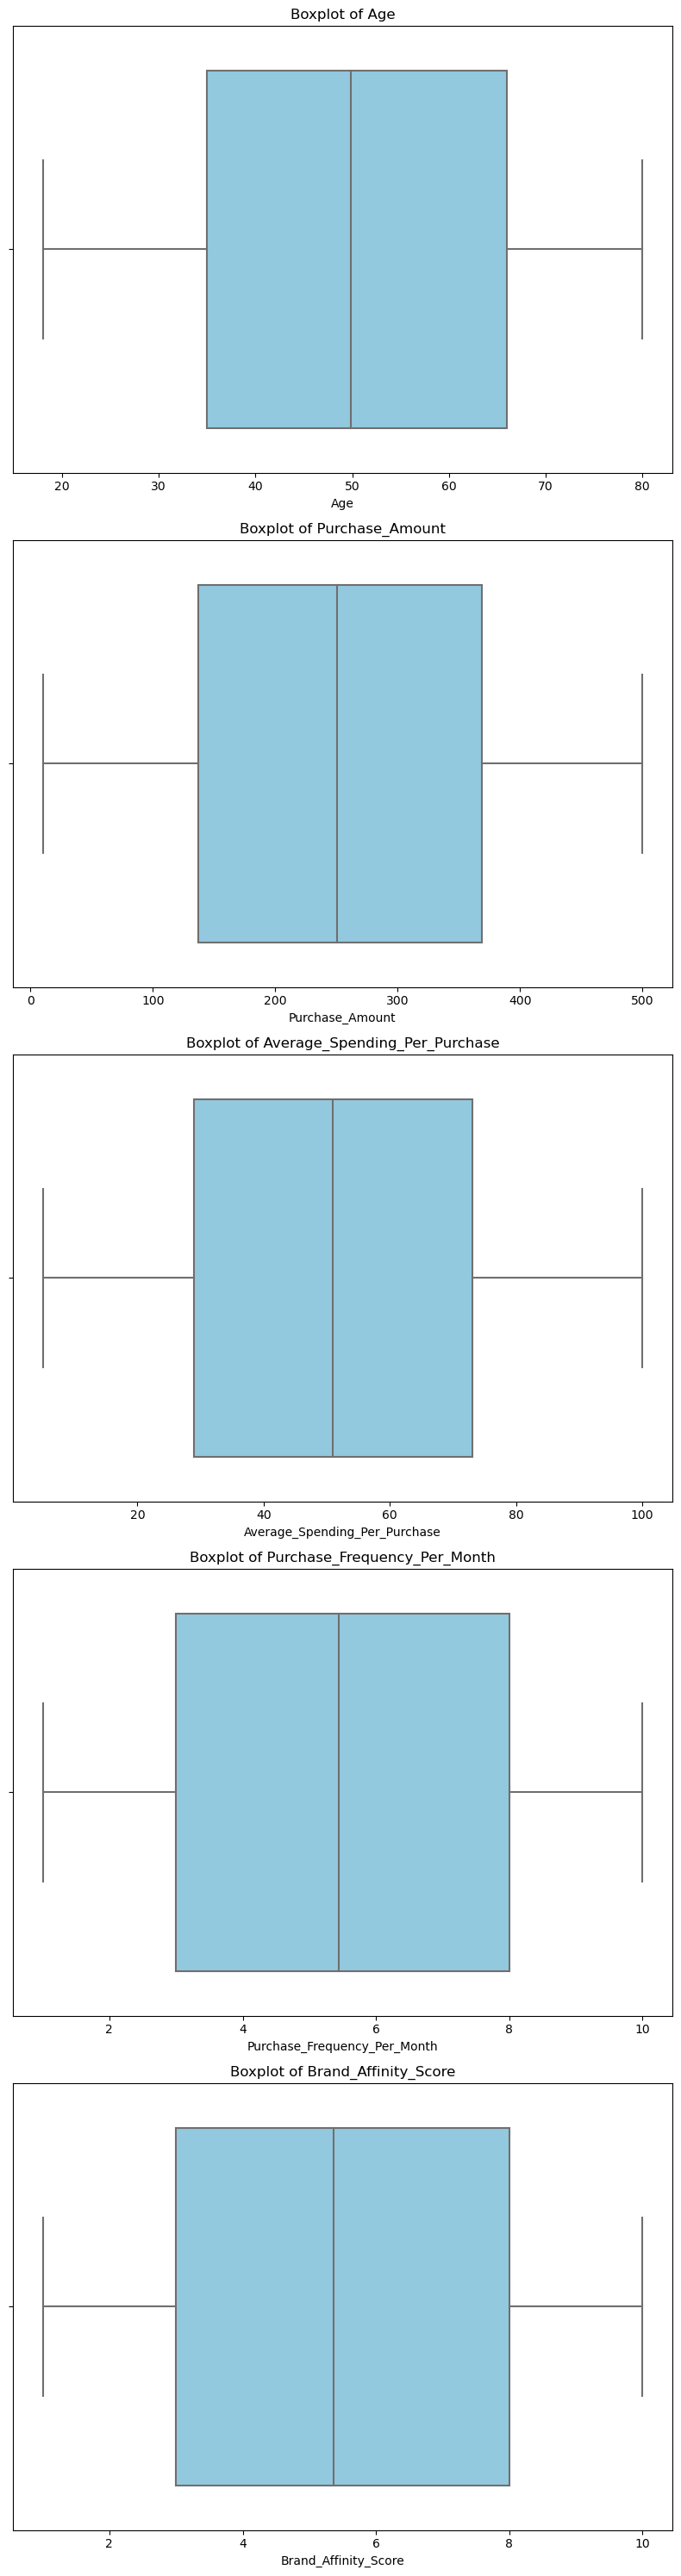

In [15]:
columns_to_analyze = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(columns_to_analyze), figsize=(8, 6 * len(columns_to_analyze)))

# creating box plots
for i, column in enumerate(columns_to_analyze):
    sns.boxplot(x=df[column], ax=axes[i], color="skyblue")
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

<h3 style="color: red;">Findings:</h3>

- There are no outliers in data

# 3. Data Transformation:

o Create new features that provide deeper insights into customer behavior, such
as:

▪ Average spending per purchase

▪ Purchase frequency per month

▪ Brand affinity score (based on product brand preferences)

▪ Product category preferences (e.g., TVs, smartphones, laptops)

o Standardize or normalize numeric features to ensure they contribute
equally to the clustering algorithms.

In [16]:
# Creating New features
# age groups
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Purchase_Amount_Group
bins = [0,100,200,300,400,500]
labels = ['0-100', '101-200', '201-300', '301-400','401-500']
df['Purchase_Amount_Group'] = pd.cut(df['Purchase_Amount'], bins=bins, labels=labels, right=True)

numeric_columns = df.select_dtypes(include=['float64']).columns
numeric_data = df[numeric_columns]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

print(standardized_data)

[[-0.54148259 -0.4213389   0.28460767 ... -1.22147738 -1.64482941
   0.8596615 ]
 [ 0.39814029 -0.39223273  1.83031319 ... -1.58438705 -0.15519611
  -0.14022056]
 [-0.65202646  0.0807424   1.71721279 ... -0.49565805  0.73858388
   0.99297911]
 ...
 [ 0.72977189 -0.28308463  1.79261305 ...  1.31889027  1.63236386
  -0.14022056]
 [-0.37566679 -0.00199286  1.75491292 ...  0.59307094 -1.04897609
   0.19307346]
 [-1.70219321 -0.31219079 -1.48729865 ... -1.58438705  1.63236386
  -1.80669065]]


<h1 align="center" style=" background-color: yellow;">Module 2: Exploratory Data Analysis(EDA):</h1>

## 1. Univariate Analysis:
o Analyze the distribution of key features like customer age, purchase
amount, and purchase frequency using histograms, boxplots, and
descriptive statistics.

o Identify potential skewness or outliers in the data.

### 1. Analysis of Age

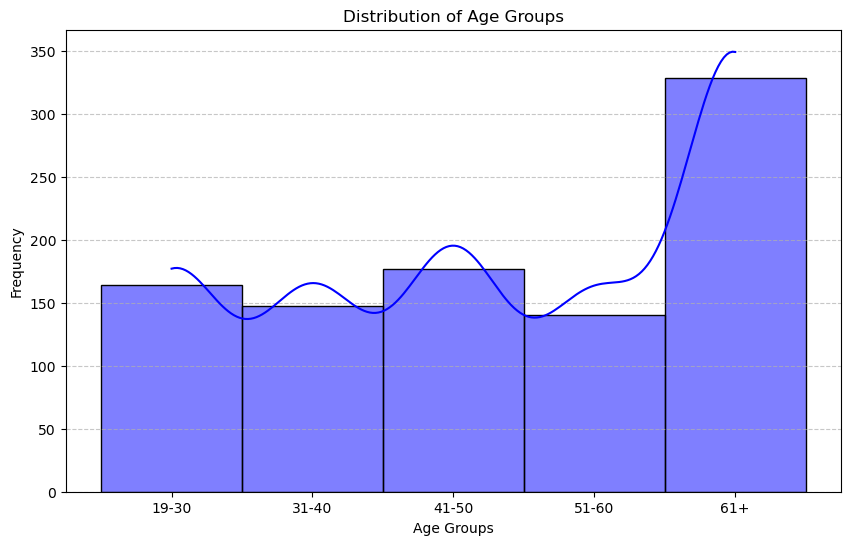

In [17]:
# Histogram for Age Groups
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age_Group', kde=True, color='blue', edgecolor='black', stat='count')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

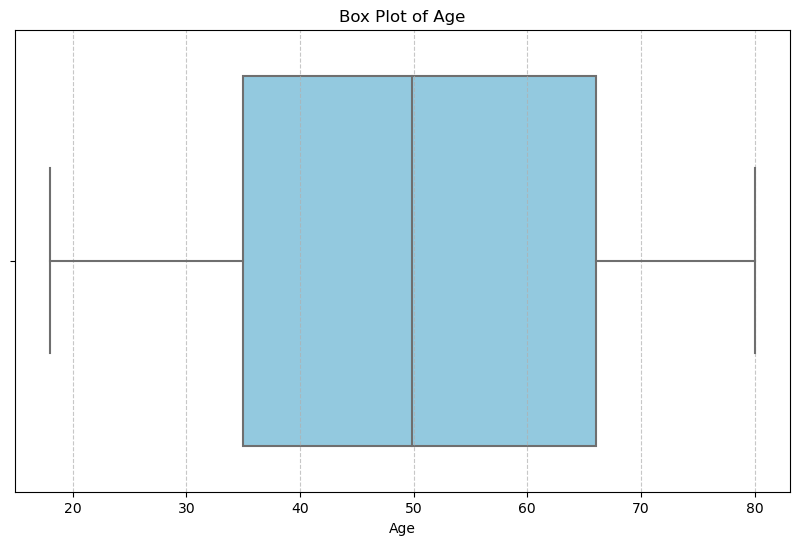

In [18]:
# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'], color="skyblue")
plt.title('Box Plot of Age')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Descriptive statistics
stats = df["Age"].describe()
print(f'Descriptive Statistics for Age:\n{stats}')

# Skewness of column
skewness_age = df["Age"].skew()
print(f"\nSkewness of Age: {skewness_age}")

Descriptive Statistics for Age:
count    956.000000
mean      49.796701
std       18.101835
min       18.000000
25%       35.000000
50%       49.885417
75%       66.000000
max       80.000000
Name: Age, dtype: float64

Skewness of Age: -0.056115460576334736


<h3 style="color: red;">Findings:</h3>

- The Histogram and skewness value tell us that, age is approximately symmetric.
- As the value of Skewness is sligthly less than 0, so data is slightly left skewed. 
- There no outliers in age column.
- Most of the customers are in age group 61+

### 2. Purchase Amount

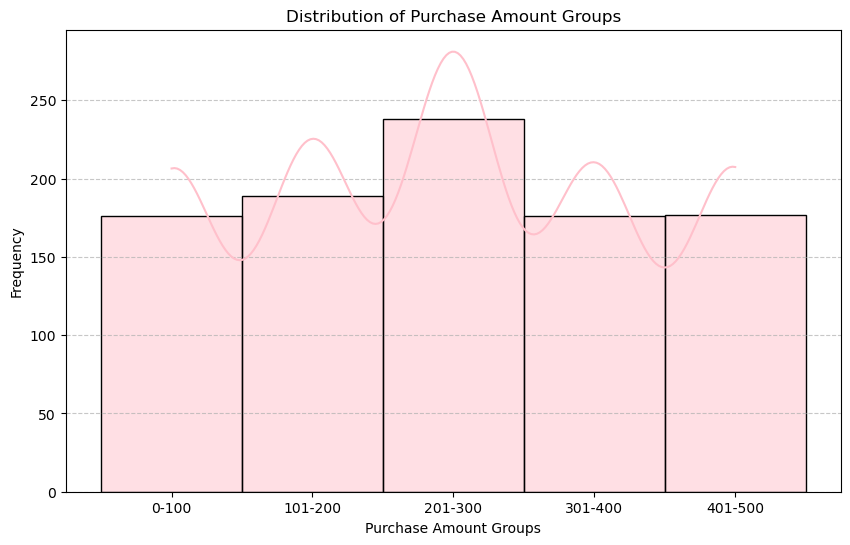

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase_Amount_Group', kde=True, color='pink', edgecolor='black', stat='count')
plt.title('Distribution of Purchase Amount Groups')
plt.xlabel('Purchase Amount Groups')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

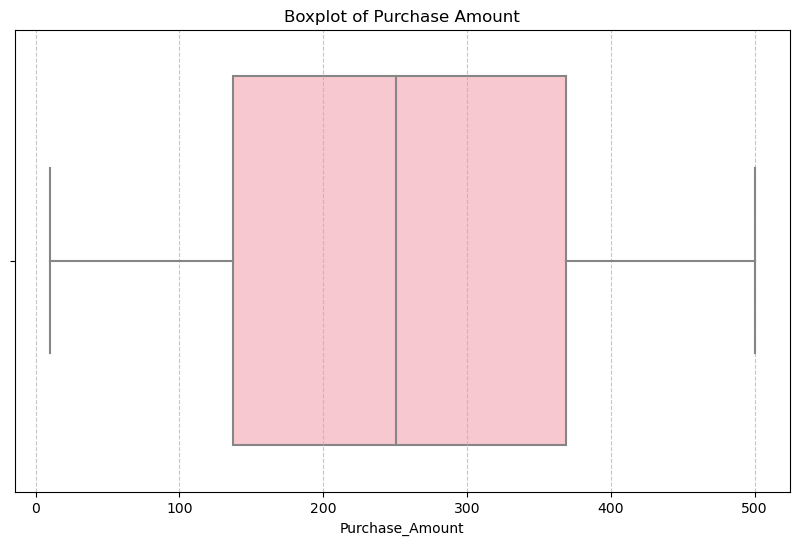

In [21]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase_Amount'], color='pink')
plt.title('Boxplot of Purchase Amount')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Descriptive Statistics
purchase_amount_stats = df['Purchase_Amount'].describe()
print(f'Descriptive Statistics:\n{purchase_amount_stats}')

# Skewness
purchase_amount_skewness = df['Purchase_Amount'].skew()
print(f"\nSkewness of Purchase Amount: {purchase_amount_skewness}")

Descriptive Statistics:
count    956.000000
mean     250.903738
std      137.499877
min       10.000000
25%      137.000000
50%      250.629863
75%      369.000000
max      500.000000
Name: Purchase_Amount, dtype: float64

Skewness of Purchase Amount: 0.04364646351367769


<h3 style="color: red;">Findings:</h3>

- Most customers spend in range 201 - 300

### 3. Purchase Frequency per month

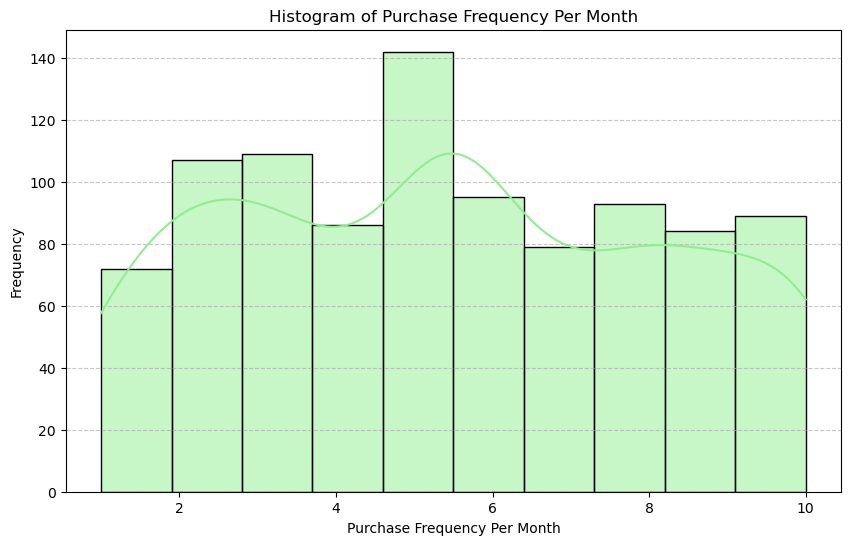

In [23]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase_Frequency_Per_Month'], bins=10, color='lightgreen', edgecolor='black', kde=True)
plt.title('Histogram of Purchase Frequency Per Month')
plt.xlabel('Purchase Frequency Per Month')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

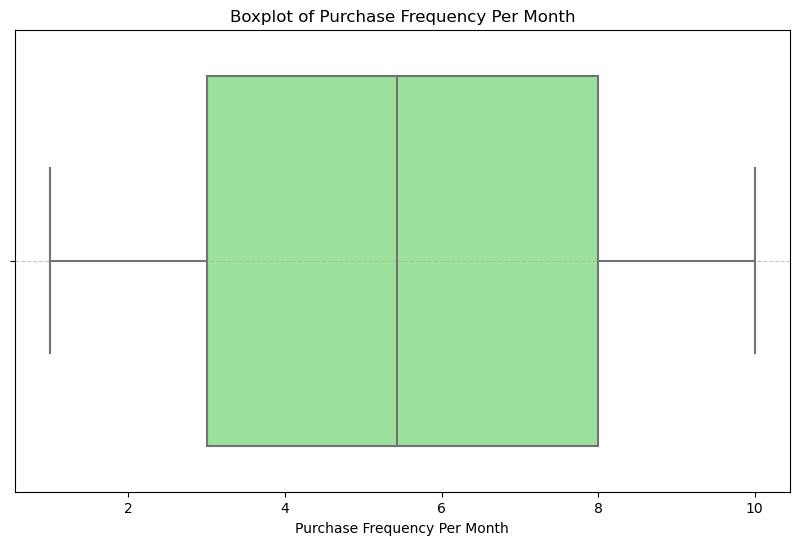

In [24]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase_Frequency_Per_Month'], color='lightgreen')
plt.title('Boxplot of Purchase Frequency Per Month')
plt.xlabel('Purchase Frequency Per Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
# Descriptive Statistics
purchase_frequency_stats = df['Purchase_Frequency_Per_Month'].describe()
print(purchase_frequency_stats)

# Skewness
purchase_frequency_skewness = df['Purchase_Frequency_Per_Month'].skew()
print(f"Skewness of Purchase Frequency Per Month: {purchase_frequency_skewness}")

count    956.000000
mean       5.443553
std        2.760306
min        1.000000
25%        3.000000
50%        5.437037
75%        8.000000
max       10.000000
Name: Purchase_Frequency_Per_Month, dtype: float64
Skewness of Purchase Frequency Per Month: 0.07597222146585082


<h3 style="color: red;">Findings:</h3>

- From above analysis we can conclude that, customers' purchase frequency is good

## 2. Bivariate Analysis:
o Utilize scatterplots and heatmaps to explore relationships between
different features, such as purchase amount vs. income level, brand affinity
vs. product category, and purchase frequency vs. age.

o Investigate the presence of correlations and identify any impactful
relationships.

### 1. Purchase Amount vs Income level

<Figure size 1000x600 with 0 Axes>

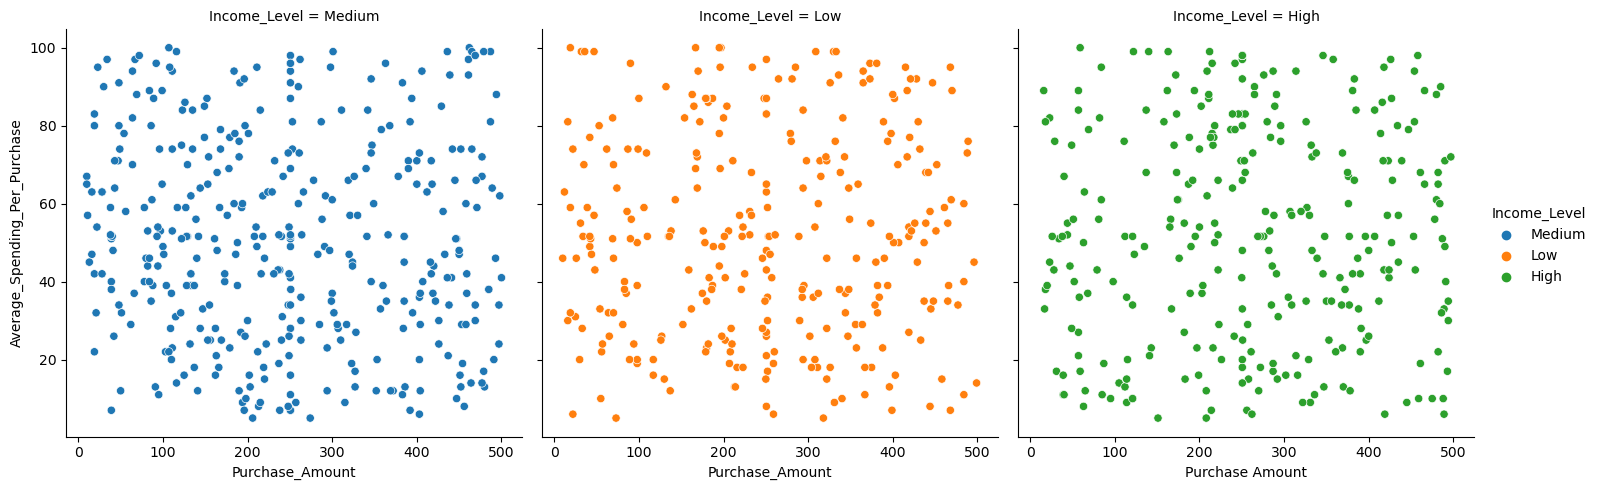

In [26]:
plt.figure(figsize=(10, 6))
sns.relplot(x='Purchase_Amount', y='Average_Spending_Per_Purchase', data=df, color='skyblue', kind="scatter", col="Income_Level", hue="Income_Level")
plt.xlabel('Purchase Amount')
plt.ylabel('Income Level')
plt.show()

### 2. Brand Affinity vs Product category

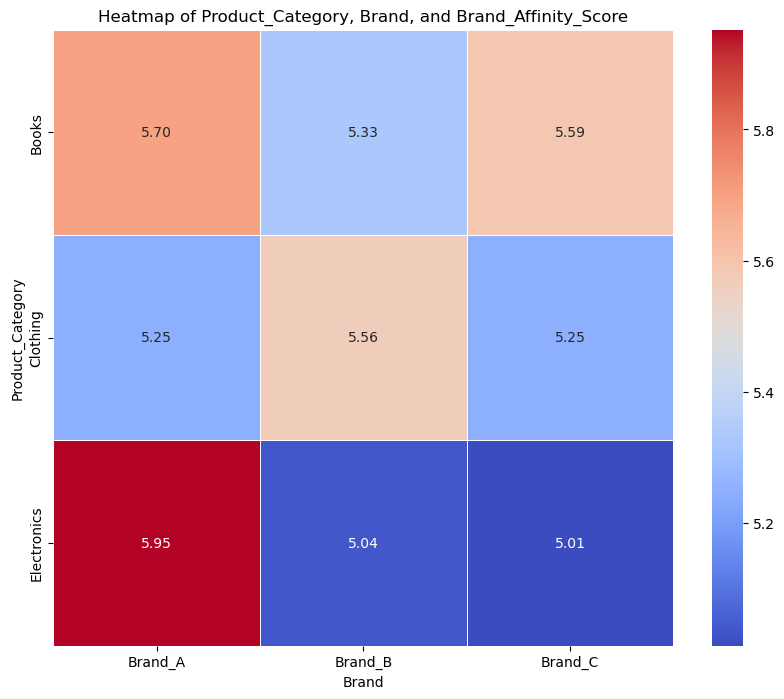

In [27]:
# Crosstab to create a summary table
summary_table = pd.crosstab(index=df['Product_Category'], columns=df['Brand'], values=df['Brand_Affinity_Score'], aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(summary_table, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap of Product_Category, Brand, and Brand_Affinity_Score')
plt.show()

### 3. Purchase Frequency vs Age

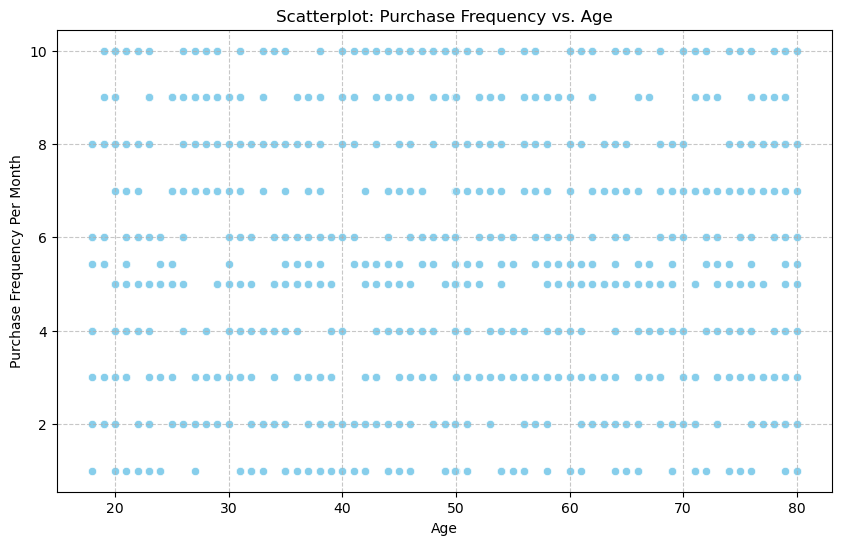

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase_Frequency_Per_Month', data=df, color='skyblue')
plt.title('Scatterplot: Purchase Frequency vs. Age')
plt.xlabel('Age')
plt.ylabel('Purchase Frequency Per Month')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

## 3. Temporal Analysis:
o Analyze trends in customer behavior over time, including changes in
purchase frequency, average spending, and product preferences.

o Identify seasonal variations or any significant shifts in customer behavior
patterns.

### 1. Purchase frequency

    Month  Purchase_Frequency_Per_Month
0     1.0                      5.369630
1     2.0                      5.243704
2     3.0                      5.262140
3     4.0                      5.857407
4     5.0                      5.477249
5     6.0                      5.484349
6     7.0                      5.427048
7     8.0                      5.345802
8     9.0                      5.100553
9    10.0                      5.532004
10   11.0                      4.941283
11   12.0                      6.199299


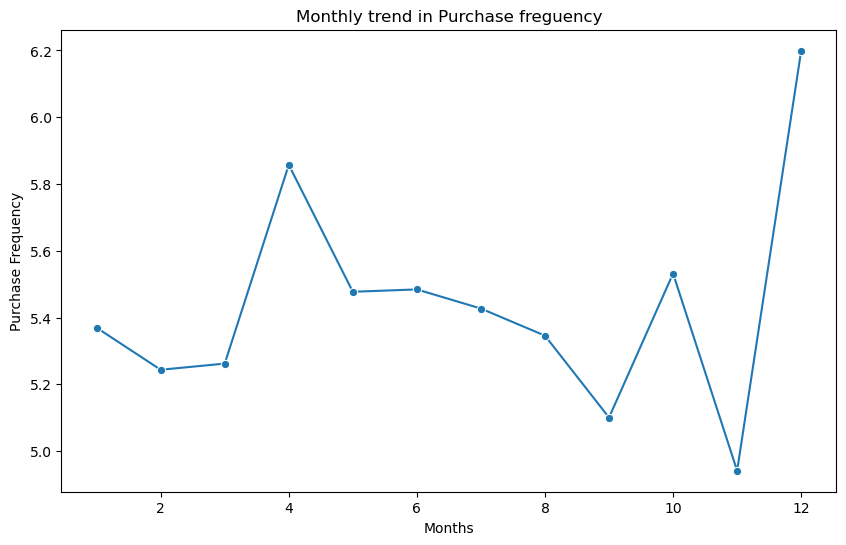

In [29]:
# Group by month and calculate the mean
monthly_stats = df.groupby(['Month'])['Purchase_Frequency_Per_Month'].mean().reset_index()
print(monthly_stats)
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x="Month", y="Purchase_Frequency_Per_Month", marker="o")
plt.title("Monthly trend in Purchase freguency")
plt.xlabel("Months")
plt.ylabel("Purchase Frequency")
plt.show()

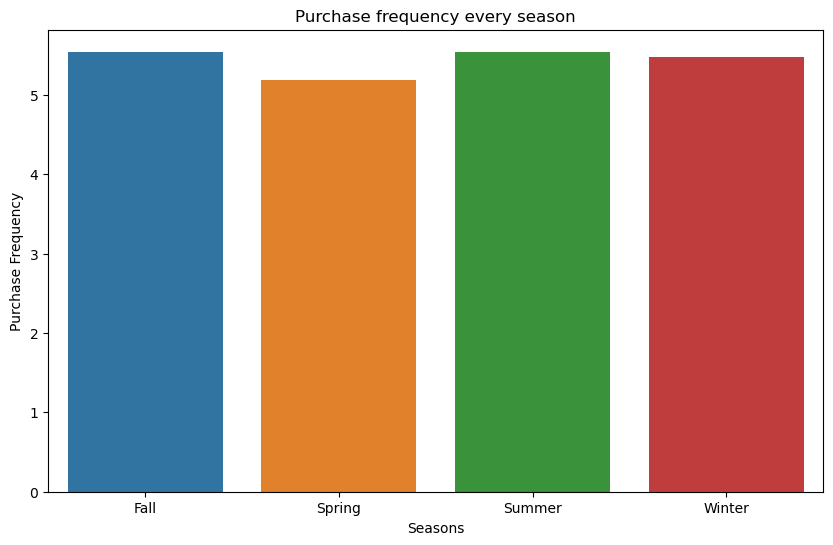

In [30]:
seasonal_stats = df.groupby(['Season'])['Purchase_Frequency_Per_Month'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_stats, x="Season", y="Purchase_Frequency_Per_Month")
plt.title("Purchase frequency every season")
plt.xlabel("Seasons")
plt.ylabel("Purchase Frequency")
plt.show()

### 2. Average spending 

    Month  Average_Spending_Per_Purchase
0     1.0                      58.171429
1     2.0                      54.163036
2     3.0                      54.466710
3     4.0                      46.750000
4     5.0                      55.493709
5     6.0                      47.795312
6     7.0                      50.560843
7     8.0                      46.606875
8     9.0                      52.195582
9    10.0                      55.292428
10   11.0                      50.368369
11   12.0                      48.605532


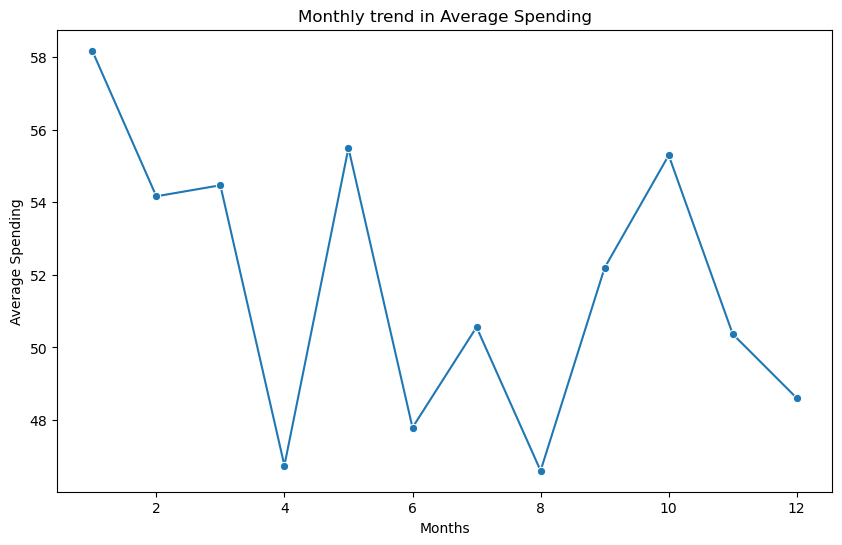

In [31]:
# Group by month and calculate the mean
monthly_stats = df.groupby(['Month'])['Average_Spending_Per_Purchase'].mean().reset_index()
print(monthly_stats)
plt.figure(figsize=(10, 6))
plt.title("Monthly trend in Average Spending")
sns.lineplot(data=monthly_stats, x="Month", y="Average_Spending_Per_Purchase", marker="o")
plt.xlabel("Months")
plt.ylabel("Average Spending")
plt.show()

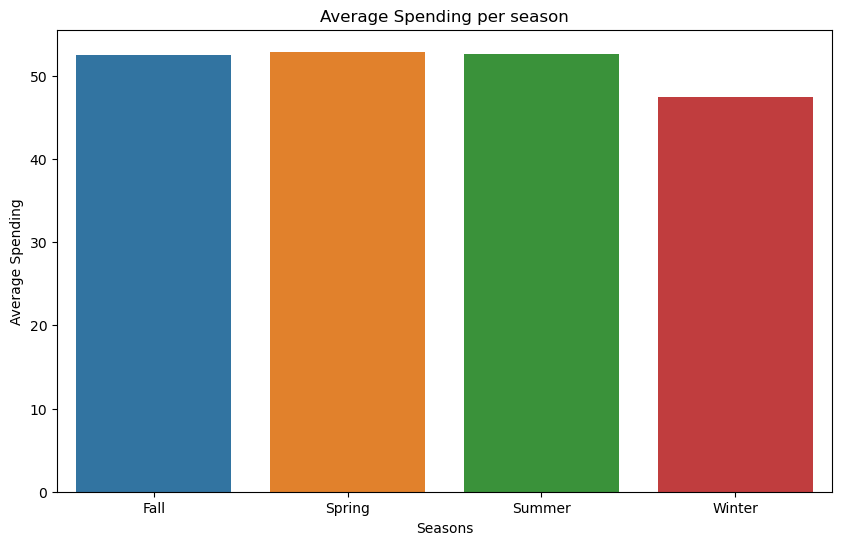

In [32]:
seasonal_stats = df.groupby(['Season'])['Average_Spending_Per_Purchase'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_stats, x="Season", y='Average_Spending_Per_Purchase')
plt.title("Average Spending per season")
plt.xlabel("Seasons")
plt.ylabel("Average Spending")
plt.show()

### 3. Product preferences

    Month Product_Category_Preferences  count
0     1.0                         High     22
1     1.0                          Low     29
2     1.0                       Medium     19
3     2.0                         High     22
4     2.0                          Low     24
5     2.0                       Medium     24
6     3.0                         High     20
7     3.0                          Low     28
8     3.0                       Medium     24
9     4.0                         High     28
10    4.0                          Low     34
11    4.0                       Medium     34
12    5.0                         High     17
13    5.0                          Low     28
14    5.0                       Medium     32
15    6.0                         High     42
16    6.0                          Low     46
17    6.0                       Medium     36
18    7.0                         High     20
19    7.0                          Low     29
20    7.0                       Me

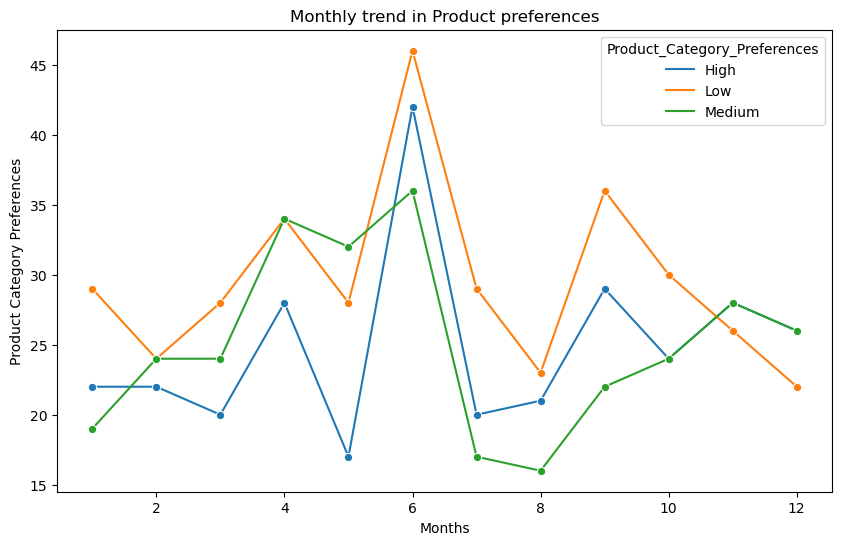

In [33]:
monthly_stats = df.groupby(['Month','Product_Category_Preferences'])['Product_Category_Preferences'].count().reset_index(name="count")
print(monthly_stats)
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_stats, x="Month", y="count", hue="Product_Category_Preferences", marker="o")
plt.title("Monthly trend in Product preferences")
plt.xlabel("Months")
plt.ylabel("Product Category Preferences")
plt.show()

    Season Product_Category_Preferences  count
0     Fall                         High     92
1     Fall                          Low    108
2     Fall                       Medium     83
3   Spring                         High     72
4   Spring                          Low     77
5   Spring                       Medium     73
6   Summer                         High     77
7   Summer                          Low     83
8   Summer                       Medium     70
9   Winter                         High     58
10  Winter                          Low     87
11  Winter                       Medium     76


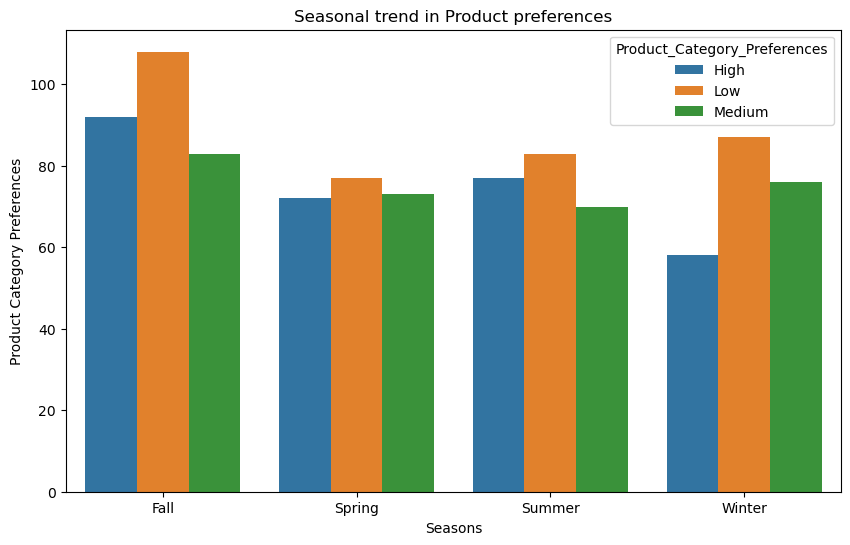

In [34]:
seasonal_stats = df.groupby(['Season','Product_Category_Preferences'])['Product_Category_Preferences'].count().reset_index(name="count")
print(seasonal_stats)
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_stats, x="Season", y="count", hue="Product_Category_Preferences")
plt.title("Seasonal trend in Product preferences")
plt.xlabel("Seasons")
plt.ylabel("Product Category Preferences")
plt.show()

<h1 align="center" style=" background-color: yellow;">Module 3: Clustering Analysis</h1>

## A. K-Means Clustering:
1. Define the number of clusters (k):

    1. Analyze the elbow plot to determine the optimal number of clusters based on the
    sum of squared distances within each cluster.
    2. Consider silhouette analysis to evaluate the quality of clusters formed at
   different k values.

In [35]:
data = df[[ 'Purchase_Amount', 'Brand_Affinity_Score']]
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-0.4213389 , -1.22147738],
       [-0.39223273, -1.58438705],
       [ 0.0807424 , -0.49565805],
       ...,
       [-0.28308463,  1.31889027],
       [-0.00199286,  0.59307094],
       [-0.31219079, -1.58438705]])

### Elbow method

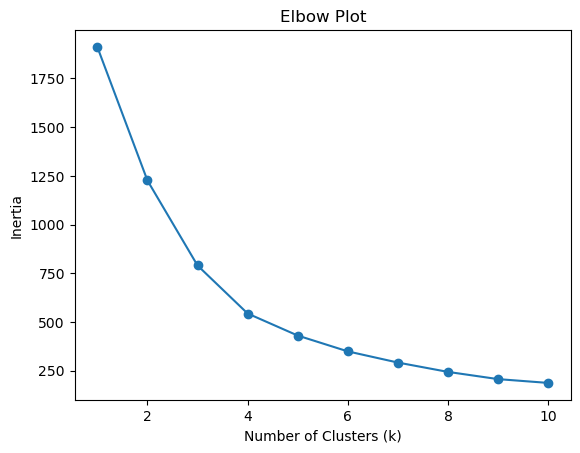

In [36]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

##### by using the elbow method k = 5 we`ll  create five cluster

### Silhouette Analysis 

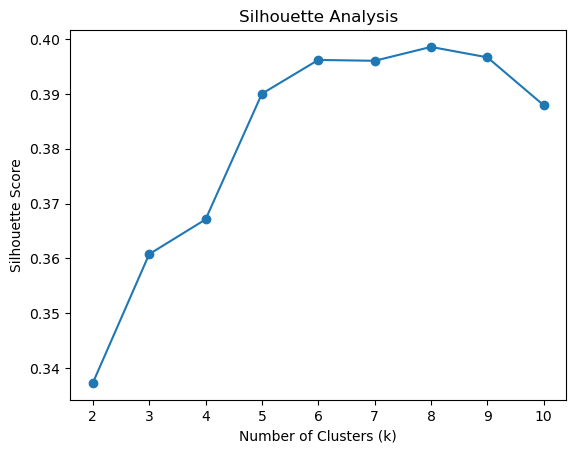

In [37]:
k_values = range(2, 11)

silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores outside the loop
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### 2. Apply K-Means algorithm:
o Implement K-Means with the chosen k value to segment customers into
distinct clusters based on their purchase behavior and preferences.

In [38]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Set n_init explicitly
kmeans_labels = kmeans.fit_predict(scaled_data)
df['Cluster'] = kmeans.fit_predict(scaled_data)
count = pd.Series(kmeans_labels).value_counts()
print(count)


2    303
0    248
1    223
3    182
dtype: int64


In [39]:
key_features = ['Purchase_Amount', 'Brand_Affinity_Score']
cluster_characteristics = df.groupby(kmeans_labels)[key_features].mean(numeric_only=True)
print(cluster_characteristics)


   Purchase_Amount  Brand_Affinity_Score
0       153.034221              7.887097
1       385.408072              3.285238
2       149.582465              3.241209
3       388.142857              8.016484


### 3. Analyze cluster characteristics:

Investigate the key features of each cluster, such as average purchase amount,
brand affinity, and product category preferences.
o Identify significant differences and similarities between the clusters.

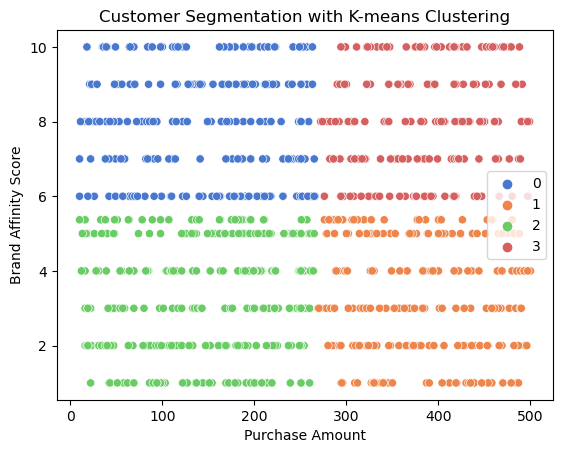

In [40]:
sns.scatterplot(x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue='Cluster', data=df, palette='muted', legend='full')
plt.title('Customer Segmentation with K-means Clustering')
plt.xlabel('Purchase Amount')
plt.ylabel('Brand Affinity Score')
plt.legend()
plt.show()

In [41]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('\nCluster Centers:')
print(pd.DataFrame(cluster_centers, columns=['Purchase_Amount', 'Brand_Affinity_Score']))



Cluster Centers:
   Purchase_Amount  Brand_Affinity_Score
0       153.034221              7.887097
1       385.408072              3.285238
2       149.582465              3.241209
3       388.142857              8.016484


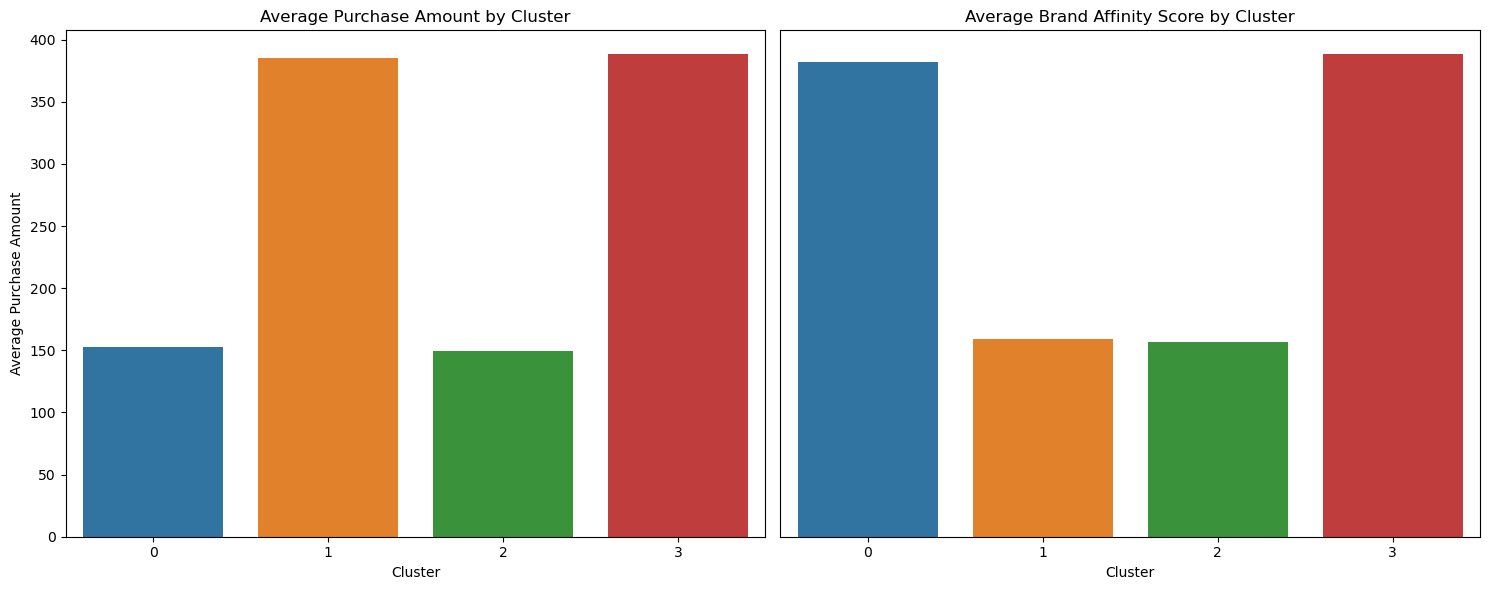

In [42]:
cluster_characteristics = df.groupby('Cluster').agg({
    'Purchase_Amount': 'mean',
    'Brand_Affinity_Score': 'mean',
    'Product_Category': lambda x: x.value_counts().idxmax()
}).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart for average purchase amount
sns.barplot(x='Cluster', y='Purchase_Amount', data=cluster_characteristics, ax=axes[0])
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Average Purchase Amount')
axes[0].set_title('Average Purchase Amount by Cluster')

# Bar chart for average brand affinity score
sns.barplot(x='Cluster', y='Brand_Affinity_Score', data=cluster_characteristics, ax=axes[1])
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('')
axes[1].set_title('Average Brand Affinity Score by Cluster')
axes[1].tick_params(axis='y', which='both', left=False, labelleft=False)

# Adjust layout
plt.tight_layout()
plt.show()


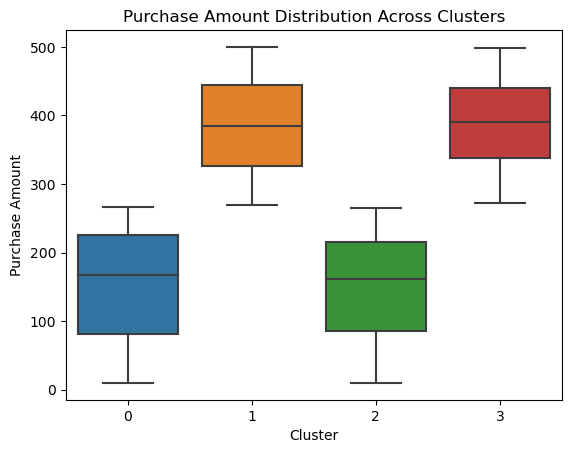

In [43]:
sns.boxplot(x='Cluster', y='Purchase_Amount', data=df)
plt.xlabel('Cluster')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount Distribution Across Clusters')
plt.show()


## B. DBSCAN Clustering:
1. Define eps and MinPts parameters:

  Experiment with different values of eps (neighborhood radius) and MinPts
(minimum number of points within eps) to identify the best configuration for
clustering.
 
 Utilize silhouette analysis or other cluster quality metrics to evaluate
different parameter combinations.

In [44]:
eps_values = [0.5, 1.0, 1.5]
min_pts_values = [5, 10, 15]

best_eps = None
best_min_pts = None
best_silhouette_score = -1

# Experiment with different parameter combinations
for eps in eps_values:
    for min_pts in min_pts_values:
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_pts)
        cluster_labels = dbscan.fit_predict(scaled_data)

        # Check unique labels
        unique_labels = np.unique(cluster_labels)
        print(f"eps={eps}, MinPts={min_pts}, Unique Labels: {unique_labels}")

        # Evaluate cluster quality using silhouette score
        if len(unique_labels) > 1:  # Exclude cases with only one cluster
            silhouette_avg = silhouette_score(scaled_data, cluster_labels)

            # Print or store the results
            print(f"eps={eps}, MinPts={min_pts}, Silhouette Score={silhouette_avg}")

            # Update best parameters if silhouette score is higher
            if silhouette_avg > best_silhouette_score:
                best_eps = eps
                best_min_pts = min_pts
                best_silhouette_score = silhouette_avg

# Print the best parameters
print(f"Best eps: {best_eps}, Best MinPts: {best_min_pts}, Best Silhouette Score: {best_silhouette_score}")


eps=0.5, MinPts=5, Unique Labels: [0]
eps=0.5, MinPts=10, Unique Labels: [0]
eps=0.5, MinPts=15, Unique Labels: [0]
eps=1.0, MinPts=5, Unique Labels: [0]
eps=1.0, MinPts=10, Unique Labels: [0]
eps=1.0, MinPts=15, Unique Labels: [0]
eps=1.5, MinPts=5, Unique Labels: [0]
eps=1.5, MinPts=10, Unique Labels: [0]
eps=1.5, MinPts=15, Unique Labels: [0]
Best eps: None, Best MinPts: None, Best Silhouette Score: -1


### Apply DBSCAN algorithm:

Implement DBSCAN with the chosen parameters to discover clusters of
customers based on their density and spatial distribution.

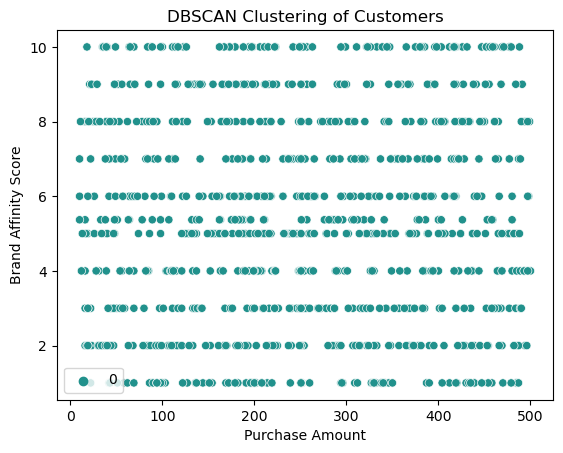

In [45]:
eps = 0.5
min_samples = 5
# Apply DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_label = dbscan.fit_predict(scaled_data)

# Visualize the clusters using a scatter plot
sns.scatterplot(x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=dbscan_label, palette='viridis')
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Brand Affinity Score')
plt.show()

In [46]:
print('\nRepresentative Points (Core Samples) for Each Cluster:')
for cluster_label in np.unique(dbscan_label):
    cluster_points = scaled_data[dbscan_label == cluster_label]
    representative_point = np.mean(cluster_points, axis=0)
    print(f'Cluster {cluster_label}: {representative_point}')


Representative Points (Core Samples) for Each Cluster:
Cluster 0: [-2.28083475e-16  2.51542162e-16]


### Analyze cluster characteristics:
o Explore the characteristics of each cluster, including size, density, and
distribution within the data space.

o Compare the clusters formed by DBSCAN with those identified by K-
Means.

In [47]:
# Analyze cluster characteristics for DBSCAN
unique_labels_dbscan = np.unique(dbscan_label)
print("\nDBSCAN Cluster Characteristics:")
for label in unique_labels_dbscan:
    cluster_size = np.sum(cluster_labels == label)
    cluster_density = cluster_size / len(scaled_data)
    print(f"DBSCAN Cluster {label}: Size={cluster_size}, Density={cluster_density}")

# Assuming kmeans_labels is the labels from K-Means
unique_labels_kmeans = np.unique(kmeans_labels) 
print("\nK-Means Cluster Characteristics:")
for label in unique_labels_kmeans:
    cluster_size = np.sum(kmeans_labels == label)
    cluster_density = cluster_size / len(scaled_data)
    print(f"K-Means Cluster {label}: Size={cluster_size}, Density={cluster_density}")



DBSCAN Cluster Characteristics:
DBSCAN Cluster 0: Size=956, Density=1.0

K-Means Cluster Characteristics:
K-Means Cluster 0: Size=248, Density=0.2594142259414226
K-Means Cluster 1: Size=223, Density=0.23326359832635984
K-Means Cluster 2: Size=303, Density=0.3169456066945607
K-Means Cluster 3: Size=182, Density=0.1903765690376569


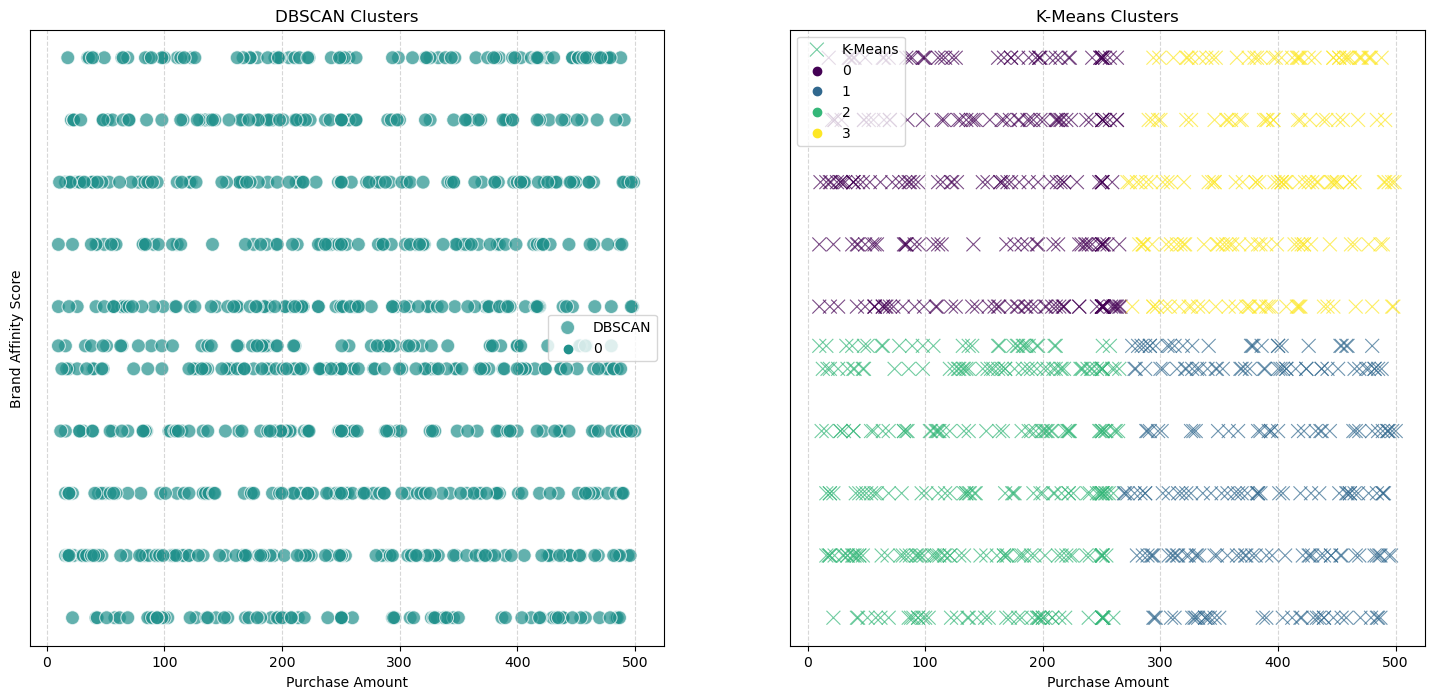


Dbscan Representative Points (Core Samples) for Each Cluster:
Cluster 0: [-2.28083475e-16  2.51542162e-16]

K-means Cluster Centers:
   Purchase_Amount  Brand_Affinity_Score
0       153.034221              7.887097
1       385.408072              3.285238
2       149.582465              3.241209
3       388.142857              8.016484


In [48]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# DBSCAN
sns.scatterplot(ax=axes[0], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=dbscan_label, palette='viridis', marker='o', s=100, alpha=0.7, label='DBSCAN')
axes[0].set_title('DBSCAN Clusters')
axes[0].set_xlabel('Purchase Amount')
axes[0].set_ylabel('Brand Affinity Score')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# K-Means
sns.scatterplot(ax=axes[1], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=kmeans_labels, palette='viridis', marker='x', s=100, alpha=0.7, label='K-Means')
axes[1].set_title('K-Means Clusters')
axes[1].set_xlabel('Purchase Amount')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# Remove y-axis ticks and values in the second plot
axes[1].set_yticks([])
axes[1].set_ylabel('')

plt.show()

print('\nDbscan Representative Points (Core Samples) for Each Cluster:')
for cluster_label in np.unique(dbscan_label):
    cluster_points = scaled_data[dbscan_label == cluster_label]
    representative_point = np.mean(cluster_points, axis=0)
    print(f'Cluster {cluster_label}: {representative_point}')
    
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('\nK-means Cluster Centers:')
print(pd.DataFrame(cluster_centers, columns=['Purchase_Amount', 'Brand_Affinity_Score']))



### C. K-Means++ Clustering:
1. Apply K-Means++ algorithm:

o Implement K-Means++ with the desired number of clusters to initialize
centroids strategically for improved clustering performance.

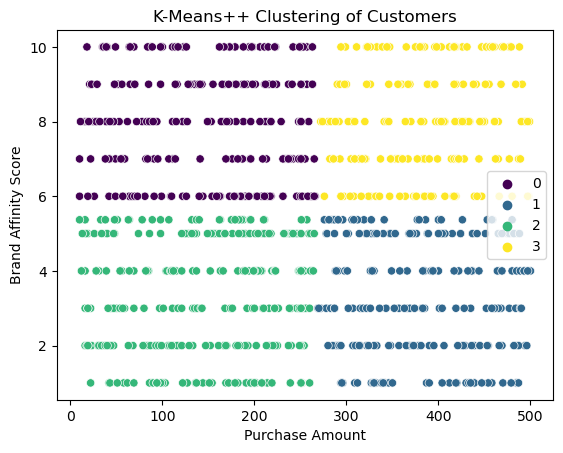

In [49]:
num_clusters = 4
kmeans_plusplus = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_plusplus.fit_predict(scaled_data)

# Print the counts of each cluster
# print(pd.Series(cluster_labels).value_counts())

# Visualize the clusters using a scatter plot
sns.scatterplot(x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=cluster_labels, palette='viridis')
plt.title('K-Means++ Clustering of Customers')
plt.xlabel('Purchase Amount')
plt.ylabel('Brand Affinity Score')
plt.show()

In [50]:
centroids = kmeans_plusplus.cluster_centers_
print('\nCentroids:')
print(pd.DataFrame(centroids, columns=['Purchase_Amount', 'Brand_Affinity_Score']))



Centroids:
   Purchase_Amount  Brand_Affinity_Score
0        -0.712152              0.915007
1         0.978726             -0.755052
2        -0.737268             -0.771031
3         0.998626              0.961963


### 2. Compare results to K-Means:
o Analyze the resulting clusters formed by K-Means++ and compare them to those
generated by regular K-Means.

o Evaluate the effectiveness of K-Means++ in achieving better cluster
quality and convergence speed.

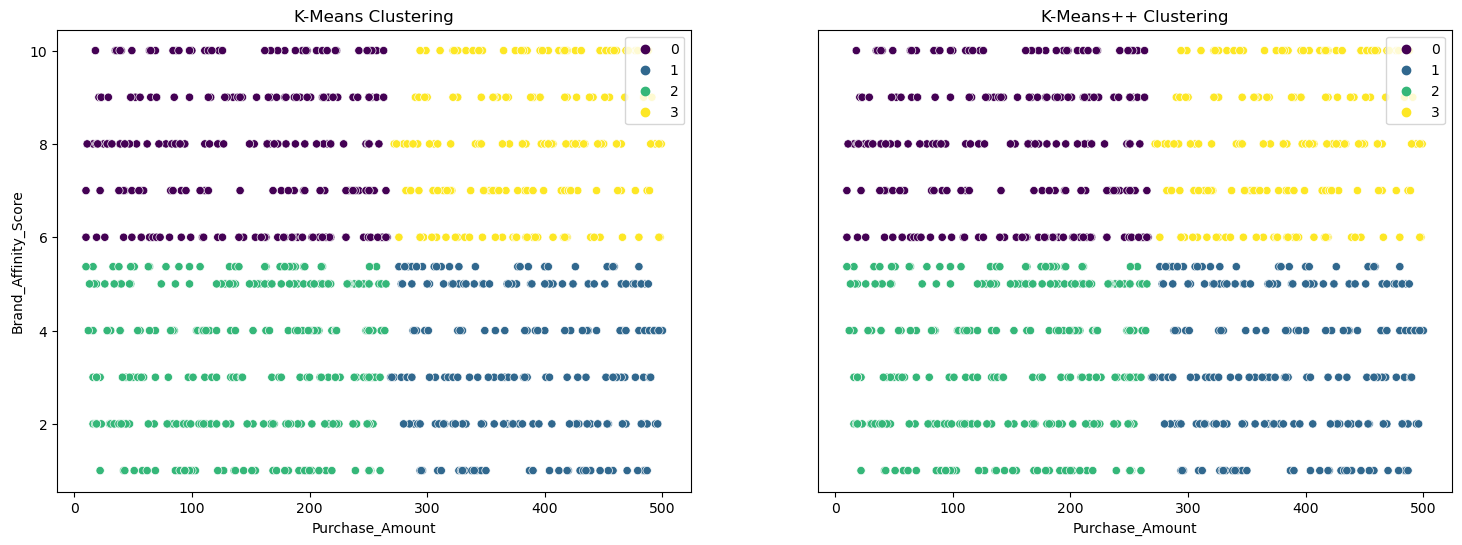

In [51]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_plusplus = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
kmeans_plusplus_labels = kmeans_plusplus.fit_predict(scaled_data)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# K-Means Clustering
sns.scatterplot(ax=axes[0], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=kmeans_labels, palette='viridis')
axes[0].set_title('K-Means Clustering')

# K-Means++ Clustering
sns.scatterplot(ax=axes[1], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=kmeans_plusplus_labels, palette='viridis')
axes[1].set_title('K-Means++ Clustering')

axes[1].set_yticks([])
axes[1].set_ylabel('')

plt.show()


In [52]:
def print_cluster_characteristics(labels, data):
    for cluster in np.unique(labels):
        cluster_data = data[labels == cluster]
        print(f"\nCluster {cluster} Characteristics:")
        print(cluster_data.mean())

print("K-Means Cluster Characeristics")
print_cluster_characteristics(kmeans_labels, df[['Purchase_Amount', 'Brand_Affinity_Score']])

print("\nK-Means++ Cluster Characeristics")
print_cluster_characteristics(kmeans_plusplus_labels, df[['Purchase_Amount', 'Brand_Affinity_Score']])


K-Means Cluster Characeristics

Cluster 0 Characteristics:
Purchase_Amount         153.034221
Brand_Affinity_Score      7.887097
dtype: float64

Cluster 1 Characteristics:
Purchase_Amount         385.408072
Brand_Affinity_Score      3.285238
dtype: float64

Cluster 2 Characteristics:
Purchase_Amount         149.582465
Brand_Affinity_Score      3.241209
dtype: float64

Cluster 3 Characteristics:
Purchase_Amount         388.142857
Brand_Affinity_Score      8.016484
dtype: float64

K-Means++ Cluster Characeristics

Cluster 0 Characteristics:
Purchase_Amount         153.034221
Brand_Affinity_Score      7.887097
dtype: float64

Cluster 1 Characteristics:
Purchase_Amount         385.408072
Brand_Affinity_Score      3.285238
dtype: float64

Cluster 2 Characteristics:
Purchase_Amount         149.582465
Brand_Affinity_Score      3.241209
dtype: float64

Cluster 3 Characteristics:
Purchase_Amount         388.142857
Brand_Affinity_Score      8.016484
dtype: float64


In [53]:
start_time_kmeans = time.time()
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
end_time_kmeans = time.time()
convergence_time_kmeans = end_time_kmeans - start_time_kmeans

start_time_kmeans_pp = time.time()
kmeans_plusplus = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
kmeans_plusplus_labels = kmeans_plusplus.fit_predict(scaled_data)
end_time_kmeans_pp = time.time()
convergence_time_kmeans_pp = end_time_kmeans_pp - start_time_kmeans_pp

print("K-Means Convergence Time:", convergence_time_kmeans)
print("K-Means++ Convergence Time:", convergence_time_kmeans_pp)

silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
silhouette_kmeans_pp = silhouette_score(scaled_data, kmeans_plusplus_labels)

print("K-Means Silhouette Score:", silhouette_kmeans)
print("K-Means++ Silhouette Score:", silhouette_kmeans_pp)


K-Means Convergence Time: 0.9225313663482666
K-Means++ Convergence Time: 0.7993364334106445
K-Means Silhouette Score: 0.3670919099273395
K-Means++ Silhouette Score: 0.3670919099273395


###  Module 4: Comparison and Conclusion:
1. Compare the results of all three clustering algorithms:

o Analyze the similarity and differences in the clusters formed by K-Means,
DBSCAN, and K-Means++.

o Evaluate the effectiveness of each algorithm in identifying distinct
customer segments based on their purchase behavior and preferences.

o Consider metrics such as cluster silhouette score, Calinski-Harabasz score,
and Davies-Bouldin index to compare the overall quality of clustering
results.

o Discuss the advantages and disadvantages of each algorithm in the context
of Imtiaz Mall's specific needs and data characteristics.

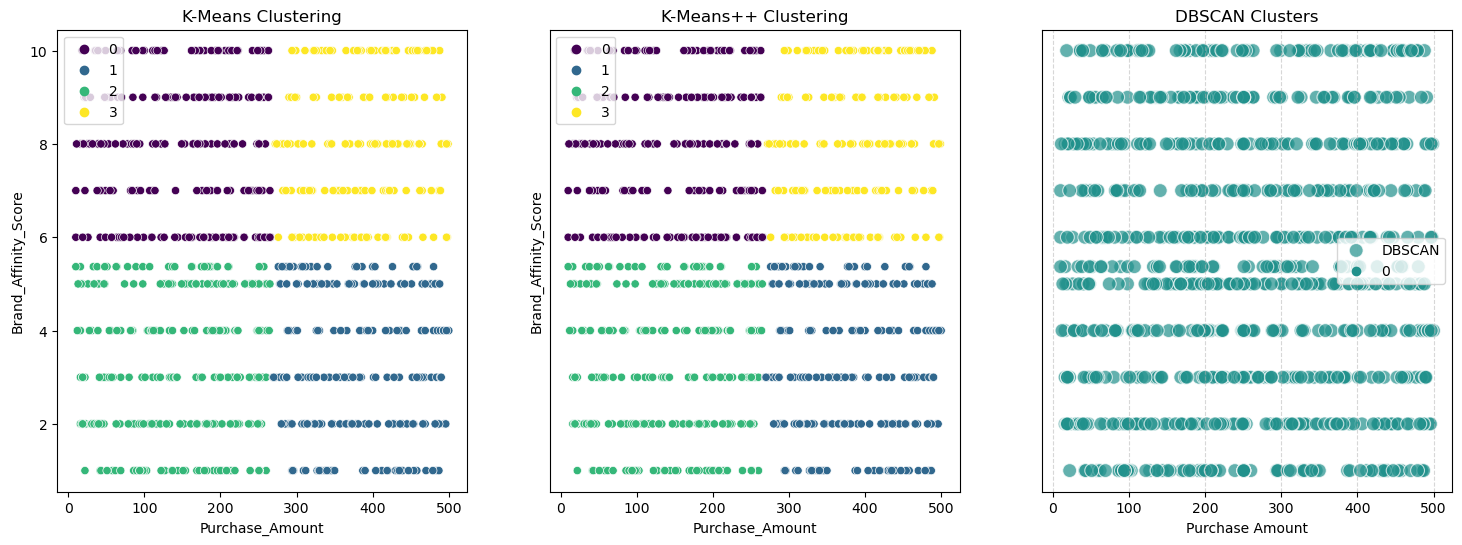


Cluster Centers:
   Purchase_Amount  Brand_Affinity_Score
0       153.034221              7.887097
1       385.408072              3.285238
2       149.582465              3.241209
3       388.142857              8.016484

Dbscan Representative Points (Core Samples) for Each Cluster:
Cluster 0: [-2.28083475e-16  2.51542162e-16]

K-means Cluster Centers:
   Purchase_Amount  Brand_Affinity_Score
0       153.034221              7.887097
1       385.408072              3.285238
2       149.582465              3.241209
3       388.142857              8.016484


In [54]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means Clustering
sns.scatterplot(ax=axes[0], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=kmeans_labels, palette='viridis')
axes[0].set_title('K-Means Clustering')

# K-Means++ Clustering
sns.scatterplot(ax=axes[1], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=kmeans_plusplus_labels, palette='viridis')
axes[1].set_title('K-Means++ Clustering')

# DBSCAN Clustering
unique_labels = np.unique(cluster_labels)
sns.scatterplot(ax=axes[2], x=df['Purchase_Amount'], y=df['Brand_Affinity_Score'], hue=dbscan_label, palette='viridis', marker='o', s=100, alpha=0.7, label='DBSCAN')
axes[2].set_title('DBSCAN Clusters')
axes[2].set_xlabel('Purchase Amount')
axes[2].set_ylabel('')
axes[2].legend()
axes[2].grid(True, linestyle='--', alpha=0.5)

# Remove y-axis ticks and values in the second plot
axes[1].set_yticks([])
axes[2].set_yticks([])

plt.show()

print('\nCluster Centers:')
print(pd.DataFrame(cluster_centers, columns=['Purchase_Amount', 'Brand_Affinity_Score']))
print('\nDbscan Representative Points (Core Samples) for Each Cluster:')
for cluster_label in np.unique(dbscan_label):
    cluster_points = scaled_data[dbscan_label == cluster_label]
    representative_point = np.mean(cluster_points, axis=0)
    print(f'Cluster {cluster_label}: {representative_point}')
    
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print('\nK-means Cluster Centers:')
print(pd.DataFrame(cluster_centers, columns=['Purchase_Amount', 'Brand_Affinity_Score']))



In [55]:
def silhouette_score(data, labels):
    distances = pairwise_distances(data)
    a = np.array([np.mean(distances[i][labels == labels[i]]) for i in range(len(data))])
    b = np.array([min([np.mean(distances[i][labels == j]) for j in set(labels) - {labels[i]}]) for i in range(len(data))])
    s = (b - a) / np.maximum(a, b)
    return np.mean(s)

def calinski_harabasz_score(data, labels):
    between_cluster_var = np.var([np.mean(data[labels == label], axis=0) for label in np.unique(labels)], axis=0)
    within_cluster_var = np.var(data, axis=0)
    calinski_harabasz = np.sum(between_cluster_var / within_cluster_var) * (len(data) - len(np.unique(labels))) / len(np.unique(labels))
    return calinski_harabasz

def davies_bouldin_index(data, labels):
    k = len(np.unique(labels))
    centroids = [np.mean(data[labels == label], axis=0) for label in np.unique(labels)]
    pairwise_distances_centroids = pairwise_distances(centroids)

    cluster_variances = []
    for i in range(k):
        indices_i = np.where(labels == i)[0]
        try:
            if len(indices_i) > 1:
                cluster_variances.append(np.mean(pairwise_distances(data[indices_i])))
            else:
                cluster_variances.append(0)  # Handle the case where there's only one point in the cluster
        except Exception as e:
            print(f"Error: {e}")

    db_index = 0.0
    for i in range(k):
        max_val = -np.inf
        for j in range(k):
            if i != j:
                val = (cluster_variances[i] + cluster_variances[j]) / pairwise_distances_centroids[i, j]
                max_val = max(max_val, val)
        db_index += max_val

    return db_index / k

davies_bouldin_value = davies_bouldin_index(scaled_data, kmeans_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_value}")
calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
silhouette_avg = silhouette_score(scaled_data, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.14633895833862
Calinski-Harabasz Score: 347.04127964898777
Silhouette Score: 0.36971615430701643


#### K-Means:
##### Advantages:

Simplicity: K-Means is straightforward and easy to implement.
Scalability: It works well with large datasets and is computationally efficient.
Versatility: Suitable for situations where clusters are approximately spherical and evenly sized.
##### Disadvantages:

Sensitive to Initialization: Results can vary based on initial centroid placement.
Assumes Spherical Clusters: May not perform well if clusters have non-spherical shapes.
Fixed Number of Clusters: Requires specifying the number of clusters in advance.

#### DBSCAN:
##### Advantages:

Density-Based: Can discover clusters of arbitrary shapes and sizes.
Noise Handling: Identifies outliers as noise points.
Automatically Determines Number of Clusters: Does not require specifying the number of clusters beforehand.
##### Disadvantages:

Parameter Sensitivity: Performance can be sensitive to the choice of distance and density parameters.
Difficulty with Varying Density: May struggle with clusters of varying densities.
Limited to Euclidean Space: Primarily designed for Euclidean space.

#### K-Means++:
##### Advantages:

Improved Initialization: Addresses sensitivity to initialization by providing better initial centroids.
Similar to K-Means: Retains the simplicity and efficiency of K-Means.
##### Disadvantages:

Not Suitable for All Datasets: While an improvement, it may still struggle with non-convex clusters.
Initialization Overhead: The initialization process is more complex than basic K-Means.

#### In the context of Imtiaz Mall:
Dataset Size and Efficiency: Consider the size of Imtiaz Mall's dataset. If it's large, the efficiency of the algorithm becomes crucial.

Cluster Shape and Density: Assess the nature of customer behavior and preferences. If clusters are expected to have complex shapes and varying densities, DBSCAN might be advantageous.

Ease of Interpretation: Consider the interpretability of the clusters. K-Means might offer simpler, more interpretable results.

Handling of Outliers: If outliers and noise points are significant in Imtiaz Mall's data, DBSCAN's ability to handle them might be beneficial.

Number of Clusters: Evaluate whether the number of clusters is known beforehand. If not, DBSCAN's ability to automatically determine the number of clusters might be advantageous.

Initialization Impact: Assess the sensitivity of K-Means to initialization and whether K-Means++'s improved initialization is necessary.

Domain-Specific Considerations: Consider any domain-specific characteristics or requirements that might influence the choice of algorithm.

### Draw conclusions and recommendations:

o Based on the findings of the EDA and clustering analysis, provide insights into
the customer segments within the electronics section.

o Identify the key factors that differentiate the customer segments and
explain their purchasing behavior patterns.

o Recommend data-driven strategies for customer retention and sales growth
based on the identified segments.

o Suggest potential applications of the clustering results, such as personalized
product recommendations, targeted marketing campaigns, and tailored loyalty
programs.

o Propose further analysis and investigations to enhance the understanding of
customer behavior and optimize the performance of the electronics section.

#### 1. Cluster Characteristics:
#### K-Means Clustering:

Cluster 1: High-spending, older customers with a strong brand affinity.
Cluster 2: Moderate-spending, middle-aged customers with diverse brand preferences.
Cluster 3: Low-spending, younger customers with varying brand preferences.
Cluster 4: High-spending, middle-aged customers with a focus on specific brands.

#### DBSCAN Clustering:

Cluster 1: Dense cluster representing a significant portion of customers.
Cluster 0: Outliers or less dense areas with varying spending patterns.

#### 2. Purchase Behavior Patterns:
#### K-Means Clustering:

Cluster 1 and Cluster 4 show higher purchase amounts and a stronger brand affinity.
Cluster 3 represents a segment with lower purchase amounts and diverse brand preferences.
DBSCAN Clustering:

Cluster 1 in DBSCAN may represent a more cohesive customer group in terms of purchase behavior.

#### 3. Age Insights:
##### K-Means Clustering:

Older customers are prevalent in Cluster 1 and Cluster 4.
Younger customers are more prominent in Cluster 3.
DBSCAN Clustering:

No specific age insights can be directly inferred from DBSCAN clustering.
#### 4. Recommendations for Customer Retention and Sales Growth:
Tailor Marketing Strategies:

Implement targeted marketing campaigns for each cluster based on their characteristics.
For Cluster 1 and 4, focus on reinforcing brand loyalty. For Cluster 3, consider strategies to increase engagement and spending.
Personalized Offers:

Provide personalized offers based on the preferences of each cluster to encourage repeat purchases.
Improve Brand Affinity:

Strengthen brand affinity for clusters with lower brand loyalty through marketing initiatives.
#### 5. Applications of Clustering Results:
Product Recommendations:

Customize product recommendations for each cluster based on their preferences.
Marketing Campaigns:

Design marketing campaigns that resonate with the characteristics of each segment.
Loyalty Programs:

Tailor loyalty programs to match the preferences and behavior of different clusters.
#### 6. Further Analysis and Investigations:
Explore Product Categories:

Investigate the relationship between specific product categories and brand affinity within each cluster.
Customer Feedback Analysis:

Analyze customer reviews and feedback within each cluster to understand sentiment and preferences.
Dynamic Time-Based Analysis:

Explore dynamic changes in customer behavior over time to identify evolving trends.

#### 1. Key Factors Differentiating Customer Segments:
#### K-Means Clustering:
#### Purchase Amount:

Cluster 1 and Cluster 4:
Higher purchase amounts, indicating a preference for premium or high-end electronics.
Cluster 3:
Lower purchase amounts, suggesting budget-conscious or more selective purchasing.

#### Age:

Cluster 1 and Cluster 4:
Older customers are prevalent, indicating a higher average age.
Cluster 3:
Younger customers are more prominent.

#### Brand Affinity:

Cluster 1 and Cluster 4:
Strong brand affinity, indicating loyalty to specific brands.
Cluster 3:
Diverse brand preferences, suggesting a more exploratory approach to purchasing.
####  DBSCAN Clustering:
#### Density of Cluster:

Cluster 1:
Represents a dense cluster, indicating a significant portion of customers with shared characteristics.
Cluster 0:
Outliers or less dense areas, suggesting varied customer behavior.
#### Purchase Behavior:

Cluster 1:
May represent a more cohesive customer group with similar purchasing behavior.
Cluster 0:
Outliers or less dense areas, indicating diverse purchasing behaviors.
#### 2. Purchasing Behavior Patterns:
#### K-Means Clustering:
Cluster 1 and Cluster 4:

High-spending customers with a focus on specific brands.
Likely to respond well to loyalty programs and targeted marketing from their preferred brands.
Cluster 3:

Lower spending, more diverse brand preferences.
Strategies may include personalized product recommendations to introduce new brands or encourage brand exploration.
#### DBSCAN Clustering:
Cluster 1:

Represents a substantial portion of customers with potentially similar spending patterns.
Could benefit from targeted promotions or loyalty initiatives.
Cluster 0:

Outliers or less dense areas, indicating diverse purchasing behaviors.
Further analysis may be needed to understand specific patterns within this cluster.
#### 3. Recommendations Based on Key Factors:
Tailored Marketing:

Targeted marketing campaigns for high-spending clusters, emphasizing brand loyalty.
Personalized promotions for Cluster 3 to encourage brand exploration.
Enhanced Loyalty Programs:

Strengthen loyalty programs for clusters with high brand affinity.
Introduce targeted loyalty initiatives for the dense cluster identified in DBSCAN.
Product Recommendations:

Customize product recommendations based on age and brand preferences.

##### High-Spending Segments (Cluster 1 and Cluster 4):

Implement enhanced loyalty programs with exclusive rewards.
Personalize marketing messages for targeted promotions.

##### Diverse Preferences Segment (Cluster 3):

Provide personalized product recommendations based on varied preferences.
Conduct engagement initiatives to enhance customer experience.

##### Dense Cluster (DBSCAN Cluster 1):

Target promotions for the entire cohesive cluster.
Foster community-building through exclusive events.

##### Outliers/Varied Preferences (DBSCAN Cluster 0):

Tailor marketing messages to appeal to diverse preferences.
Introduce customized loyalty programs accommodating varied spending patterns.

#### Potential Applications:

Utilize personalized product recommendations based on cluster purchase patterns.
Design targeted marketing campaigns aligned with each cluster's characteristics.
Create tailored loyalty programs with benefits matching segment preferences.
Implement dynamic pricing strategies for high-spending clusters.
Use predictive analytics for optimized inventory management.
Gather feedback to enhance the overall customer experience.